# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [1]:
import numpy as np
from numba import config
from diffusionpy import Diffusion_MS,vpure,DlnaDlnx,D_Matrix
import matplotlib.pyplot as plt
from epcsaftpy import THdiag,component,pcsaft

The experimental data for this example was taken from Schabel 2006 (https://doi.org/10.1016/j.ces.2006.12.062)

In [2]:
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])

wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])

wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])

wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=2E-5
wi0=np.asarray([0.333333333,0.333333333,0.333333333])
wi8=np.asarray([0.00001,0.127606346,0.872393654])
Mi=np.asarray([32.04,92.14,100000])
T=298.15
P=1E5


We define the PC-SAFT parameters

In [4]:
Methanol = component('Methanol', ms = 1.5255, sigma = 3.23 , eps = 188.9, 
               kappaAB = 0.035176, eAB = 2899.5, sites = [0, 1, 1], Mw = 32.042)
Toloul = component('Toloul', ms = 2.8149, sigma = 3.7169 , eps = 285.69, 
               kappaAB = 0., eAB = 0., sites = [0, 0, 0], Mw = 92.142)
PVac = component('PVac', ms = 2889.9, sigma = 3.3972, eps = 204.65,
                 kappaAB = 0., eAB = 0., sites = [0, 1047, 1047], Mw = 90000)

mix = Methanol + Toloul + PVac 
saft = pcsaft(mix, compute_critical = False)
T=298.15
p=1E5
mi=np.asarray([1.5255, 2.8149, 2889.9])
sigi=np.asarray([3.2300, 3.7169, 3.3972])
ui=np.asarray([188.9, 285.69, 204.65])
kapi=np.asarray([0.035176, 0., 0.])
epsAiBi=np.asarray([2899.5, 0., 0.])
N=np.asarray([1., 0., 1047.])
Mw=np.asarray([32.042,  92.142, 90000.])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kapi,N)
kij=D_Matrix(np.asarray([0.029,-0.05855362,0.027776682]),nc)



For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [5]:
#Dvec=np.asarray([1E-8,2.3E-11,1.7E-11])


Dvec=np.asarray([1E-3,2.3E-11,1.7E-11])

Next we define the time array and which component is mobile

In [6]:
nt=300
t=np.linspace(0,texp[-1],nt)
volatile=np.asarray([True,True,False])

CasADi -  MESSAGE("integrator::init") [.../casadi/core/function_internal.cpp:477]
CasADi -  MESSAGE("integrator::create_function daeF:[x, z, p, t]->[ode, alg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadF:[x, z, p, t]->[quad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function daeB:[rx, rz, rp, x, z, p, t]->[rode, ralg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadB:[rx, rz, rp, x, z, p, t]->[rquad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("IDA initialized") [.../casadi/interfaces/sundials/idas_interface.cpp:290]
CasADi -  MESSAGE("Attached linear solver") [.../casadi/interfaces/sundials/idas_interface.cpp:384]
CasADi -  MESSAGE("Initialized adjoint sensitivities") [.../casadi/interfaces/sundials/idas_interface.cpp:392]
CasADi -  MESSAGE("integrator::reset") [.../casadi/interfaces/sundials/idas_interface.cpp:406]
------------- 

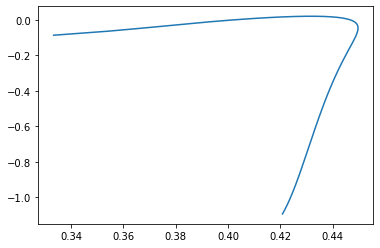

In [7]:
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile)

Gammai=np.asarray([DlnaDlnx(T,vpures,np.ascontiguousarray(wt[i,:]),mi,sigi,ui,epsAiBi,kapi,N,Mw,kij,idx=2) for i in range(nt)]).T
plt.plot(wt[:,1],Gammai[1,0,:])

In [8]:
for i in range(20):
    
    Gammai=np.asarray([DlnaDlnx(T,vpures,np.ascontiguousarray(wt[i,:]),mi,sigi,ui,epsAiBi,kapi,N,Mw,kij) for i in range(nt)]).T
    #Gammai=(Gammai*i/5+np.stack([np.eye(nc)]*nt).T*(5-i)/5)
    wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile,Gammai=Gammai)


CasADi -  MESSAGE("integrator::init") [.../casadi/core/function_internal.cpp:477]
CasADi -  MESSAGE("integrator::create_function daeF:[x, z, p, t]->[ode, alg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadF:[x, z, p, t]->[quad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function daeB:[rx, rz, rp, x, z, p, t]->[rode, ralg]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("integrator::create_function quadB:[rx, rz, rp, x, z, p, t]->[rquad]") [.../casadi/core/oracle_function.cpp:132]
CasADi -  MESSAGE("IDA initialized") [.../casadi/interfaces/sundials/idas_interface.cpp:290]
CasADi -  MESSAGE("Attached linear solver") [.../casadi/interfaces/sundials/idas_interface.cpp:384]
CasADi -  MESSAGE("Initialized adjoint sensitivities") [.../casadi/interfaces/sundials/idas_interface.cpp:392]
CasADi -  MESSAGE("integrator::reset") [.../casadi/interfaces/sundials/idas_interface.cpp:406]
------------- 

We plot the results

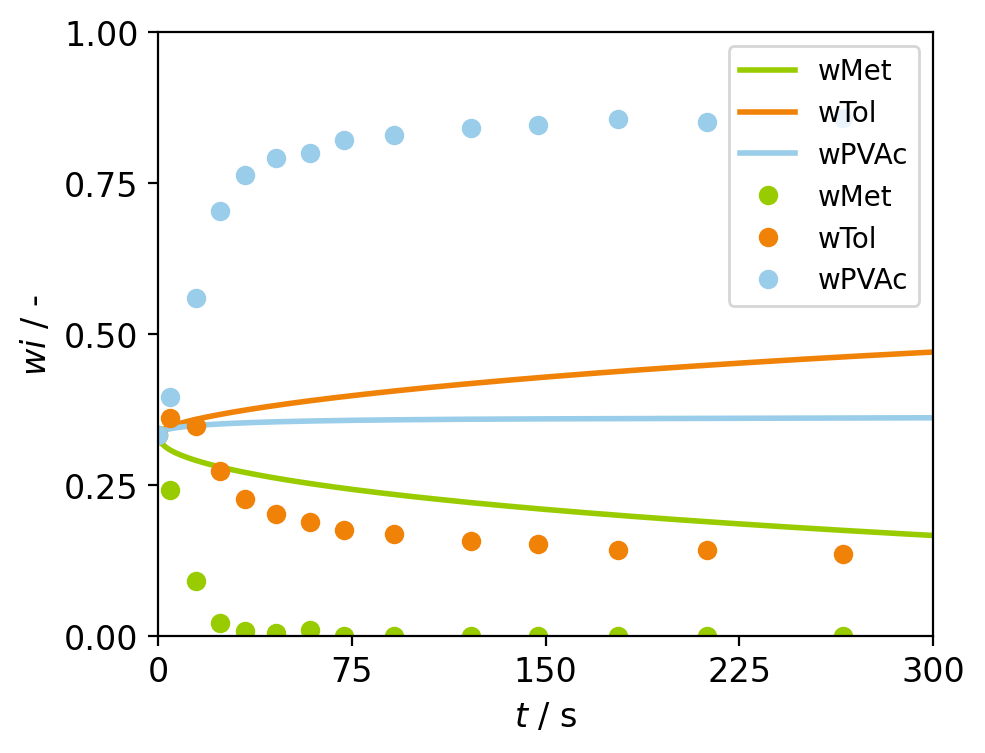

In [9]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(t,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(t,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPVAc")

ax.plot(texp,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(texp,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(texp,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "wPVAc")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()